## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [11]:
from IPython.display import Image
from requests import get
import random

class Pokemon():
    def __init__(self, name):
        try:
            name = int(name)
        except:
            name = name.lower()
        self.name = name
        self.abilities = []
        self.moves_limit = 4
        self.moves = []
        self.all_moves = []
        self.types = []
        self.weight = None
        self.height = None
        self.sprite = None
        self.evolutions = None
        self.id = None
        self.pokemon_info_api_call()
    
    def __repr__(self):
        return f"<Pokemon: {self.name}>"
    
    
    def pokemon_info_api_call(self):
        response = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        
        if response.ok:
            data = response.json()
        else:
            return f'Error {response.status_code}'
        
        ability_names = {item['ability']['name'] : item['ability'] for item in data['abilities']}
        all_moves = {move['move']['name'] for move in data['moves']}
        types = {type['type']['name']: type['type'] for type in data['types']}
        
        known_moves = []
        for _ in range(self.moves_limit):
            known_moves.append(random.choice(list(all_moves)))
        
        self.name = data['name']
        self.id = data['id']
        self.moves = known_moves
        self.all_moves = all_moves
        self.types = types
        self.abilities = ability_names
        self.weight = data['weight']
        self.height = data['height']
        self.sprite = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
        if not self.sprite:
                self.sprite = data['sprites']['front_default']
        self.evolutions = self.get_evolutions(data)
    
    
    def get_evolutions(self, data):
        species = get(data['species']['url'])
        chain = get(species.json()['evolution_chain']['url'])
        chain = [chain.json()['chain']]
        while chain != []:
            if type(chain) == type([]):
                for evo in chain:
                    if evo['species']['name'] == self.name:
                        return [e['species']['name'] for e in evo['evolves_to']]
                    else:
                        chain = [e for e in evo['evolves_to']]


    def display_image(self, size = 150):
        display(Image(self.sprite, width=size))


    def display_pokemon_info(self):
        print(f'{self.name}   Weight: {self.weight}   Height: {self.height}')
        print('Types: ',end='')
        for poke_type in self.types:
            print(poke_type, end=', ')
        print('\nAbilities: ',end='')
        for ability in self.abilities:
            print(ability, end=', ')
        print('\nKnown Moves: ',end='')
        for move in self.moves:
            print(move, end=', ')
        self.display_image()
    
    
    def display_rand_pokemon(self):
        pokemon = Pokemon(random.randint(1,898))
        pokemon.display_pokemon_info()
    
    
    def evolve(self):
        if self.evolutions != []:
            choice = random.choice(self.evolutions)
            print(f'{self.name.title()} is evolving in to {choice.title()}')
            response = get(f'https://pokeapi.co/api/v2/pokemon/{choice}')
        
            if response.ok:
                data = response.json()
            else:
                return f'Error {response.status_code}'
            
            ability_names = {item['ability']['name'] : item['ability'] for item in data['abilities']}
            all_moves = {move['move']['name'] for move in data['moves']}
            types = {type['type']['name']: type['type'] for type in data['types']}
            
            known_moves = []
            for _ in range(self.moves_limit):
                known_moves.append(random.choice(list(all_moves)))
            
            self.name = data['name']
            self.id = data['id']
            self.all_moves = all_moves
            self.types = types
            self.abilities = ability_names
            self.weight = data['weight']
            self.height = data['height']
            self.sprite = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            if not self.sprite:
                    self.sprite = data['sprites']['front_default']
            self.evolutions = self.get_evolutions(data)
            self.display_pokemon_info()
        else:
            print(f"Your {self.name} can't evolve!")

In [12]:
slowking = Pokemon('slowking')

fomantis   Weight: 15   Height: 3
Types: grass, 
Abilities: leaf-guard, contrary, 
Known Moves: facade, weather-ball, double-team, giga-drain, 

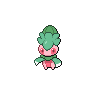

In [13]:
slowking.display_rand_pokemon()

growlithe   Weight: 190   Height: 7
Types: fire, 
Abilities: intimidate, flash-fire, justified, 
Known Moves: take-down, attract, swagger, headbutt, 

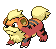

In [14]:
slowking.display_rand_pokemon()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [15]:
eevee = Pokemon('eevee')
wurmple = Pokemon('Wurmple')
kirlia = Pokemon('kirlia')

Now let's evolve a few

Eevee is evolving in to Umbreon
umbreon   Weight: 270   Height: 10
Types: dark, 
Abilities: synchronize, inner-focus, 
Known Moves: rest, captivate, baby-doll-eyes, snore, 

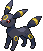

In [16]:
eevee.evolve()

Wurmple is evolving in to Silcoon
silcoon   Weight: 100   Height: 6
Types: bug, 
Abilities: shed-skin, 
Known Moves: string-shot, tackle, string-shot, electroweb, 

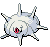

In [17]:
wurmple.evolve()

Kirlia is evolving in to Gardevoir
gardevoir   Weight: 484   Height: 16
Types: psychic, fairy, 
Abilities: synchronize, trace, telepathy, 
Known Moves: snatch, calm-mind, safeguard, encore, 

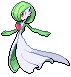

In [18]:
kirlia.evolve()

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [19]:
class Move_Tutor(Pokemon):
    def __init__(self):
        self.move_list = []
    
    
    def teach_move(self):
        if len(self.moves) <  self.moves_limit:
            self.moves.append(random.choice(list(self.all_moves)))
        else:
            self.show_moves()
            while True:
                answer = input('\nWhich move would you like to replace? [1/2/3/4]: ')
                try:
                    answer = int(answer)
                    break
                except:
                    print('Please enter a valid number [1/2/3/4]')
            new_move = random.choice(list(self.all_moves))
            print(f'\n\n{self.moves[answer - 1]} is being replaced with {new_move}')
            self.moves[answer - 1] = new_move

    
    def show_moves(self):
        print(f"\n{self.name}'s Known Moves.")
        for i, move in enumerate(self.moves):
            print(f'{i+1}. {move}')

In [20]:
from IPython.display import Image
from requests import get
import random

class Pokemon(Move_Tutor):
    def __init__(self, name):
        try:
            name = int(name)
        except:
            name = name.lower()
        self.name = name
        self.abilities = []
        self.moves_limit = 4
        self.moves = []
        self.all_moves = []
        self.types = []
        self.weight = None
        self.height = None
        self.sprite = None
        self.evolutions = None
        self.id = None
        self.pokemon_info_api_call()
    
    def __repr__(self):
        return f"<Pokemon: {self.name}>"
    
    
    def pokemon_info_api_call(self):
        response = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        
        if response.ok:
            data = response.json()
        else:
            return f'Error {response.status_code}'
        
        ability_names = {item['ability']['name'] : item['ability'] for item in data['abilities']}
        all_moves = {move['move']['name'] for move in data['moves']}
        types = {type['type']['name']: type['type'] for type in data['types']}
        
        known_moves = []
        for _ in range(self.moves_limit):
            known_moves.append(random.choice(list(all_moves)))
        
        self.name = data['name']
        self.id = data['id']
        self.moves = known_moves
        self.all_moves = all_moves
        self.types = types
        self.abilities = ability_names
        self.weight = data['weight']
        self.height = data['height']
        self.sprite = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
        if not self.sprite:
                self.sprite = data['sprites']['front_default']
        self.evolutions = self.get_evolutions(data)
    
    
    def get_evolutions(self, data):
        species = get(data['species']['url'])
        chain = get(species.json()['evolution_chain']['url'])
        chain = [chain.json()['chain']]
        while chain != []:
            if type(chain) == type([]):
                for evo in chain:
                    if evo['species']['name'] == self.name:
                        return [e['species']['name'] for e in evo['evolves_to']]
                    else:
                        chain = [e for e in evo['evolves_to']]


    def display_image(self, size = 150):
        display(Image(self.sprite, width=size))


    def display_pokemon_info(self):
        print(f'{self.name}   Weight: {self.weight}   Height: {self.height}')
        print('Types: ',end='')
        for poke_type in self.types:
            print(poke_type, end=', ')
        print('\nAbilities: ',end='')
        for ability in self.abilities:
            print(ability, end=', ')
        print('\nKnown Moves: ',end='')
        for move in self.moves:
            print(move, end=', ')
        self.display_image()
    
    
    def display_rand_pokemon(self):
        pokemon = Pokemon(random.randint(1,898))
        pokemon.display_pokemon_info()
    
    
    def evolve(self):
        if self.evolutions != []:
            choice = random.choice(self.evolutions)
            print(f'{self.name.title()} is evolving in to {choice.title()}')
            response = get(f'https://pokeapi.co/api/v2/pokemon/{choice}')
        
            if response.ok:
                data = response.json()
            else:
                return f'Error {response.status_code}'
            
            ability_names = {item['ability']['name'] : item['ability'] for item in data['abilities']}
            all_moves = {move['move']['name'] for move in data['moves']}
            types = {type['type']['name']: type['type'] for type in data['types']}
            
            known_moves = []
            for _ in range(self.moves_limit):
                known_moves.append(random.choice(list(all_moves)))
            
            self.name = data['name']
            self.id = data['id']
            self.all_moves = all_moves
            self.types = types
            self.abilities = ability_names
            self.weight = data['weight']
            self.height = data['height']
            self.sprite = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            if not self.sprite:
                    self.sprite = data['sprites']['front_default']
            self.evolutions = self.get_evolutions(data)
            self.display_pokemon_info()
        else:
            print(f"Your {self.name} can't evolve!")

In [21]:
pikachu = Pokemon('pikachu')

In [22]:
pikachu.teach_move()


pikachu's Known Moves.
1. dig
2. grass-knot
3. mega-punch
4. uproar


dig is being replaced with substitute


In [23]:
pikachu.show_moves()


pikachu's Known Moves.
1. substitute
2. grass-knot
3. mega-punch
4. uproar
